# Fuzzy
Modul ini merupakan konversi dari modul praktikum Sistem Cerdas dan Pendukung Keputusan. Dalam modul praktikum yang digunakan saat ini, keseluruhan contoh program ditulis dalam Matlab. Dalam modul ini saya mencoba membuat pendekatan lain dengan menuliskan program yang ada dengan menggunakan Python sehingga memudahkan dalam proses implementasinya.

Sebelum memulai, modul ini berisikan studi kasus dimana kita akan mengimplementasikan logika fuzzy untuk membantu dalam memberikan nilai bonus yang tepat. Dalam kasus ini parameter perhitungan berdasarkan pada kualitas makanan dan pelayanan.

## Persiapan 

Implementasi modul ini menggunakan dua buah library yaitu ```numpy``` dan ```skfuzzy```. Apabila dalam mesin teman-teman belum terinstall modul tersebut, maka bisa menginstallnya terlebih dahulu melalui pip atau yang lainnya seperti anaconda.

Perintah instalasi ```numpy``` dapat dilihat pada baris dibawah ini:

In [ ]:
pip install numpy

atau

In [ ]:
conda install -c anaconda numpy

Sedangkan perintah instalasi ```skfuzzy``` dapat dilihat pada baris dibawah ini:

In [ ]:
pip install scikit-fuzzy

atau

In [ ]:
conda install -c conda-forge scikit-fuzzy

## Impelementasi 
Pertama yang perlu dilakukan adalah melakukan import kedua buah library yang dibutuhkan

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Proses selanjutnya yaitu membuat objek untuk Antecedent/Consequent yang berisikan variabel semesta dan fungsi membership.
Dalam kasus ini terdapat dua buah **Antecedent** yaitu:
- Pelayanan
- Makanan

dan satu buah **Consequent** atau tujuan akhir kita, yaitu bonus yang diperoleh.

Masing-masing variabel terebut memiliki rentang nilai sebagai berikut:

|Variabel|Nilai|
|---|---|
| Pelayanan |0 s/d 10 |
| Makanan | 0 s/d 10 |
| Bonus | 0 s/d 30 |

In [2]:
pelayanan = ctrl.Antecedent(np.arange(0, 11, 1), 'pelayanan')
makanan   = ctrl.Antecedent(np.arange(0, 11, 1), 'makanan')
bonus     = ctrl.Consequent(np.arange(0, 31, 1), 'bonus')

## Fuzzyfikasi
Dalam proses fuzzyfikasi ini, saya menggunakan fungsi triangular membership dikarenakan kemudahan dalam memahaminya. Selain itu implementasinya juga sangat sederhana. Dalam ```skfuzzy``` triangular membership dapat digunakan dengan memanfaatkan fungsi ```trimf```.

### Membership pelayanan
Dalam variabel pelayanan, terdapat tiga buah kriteria, yaitu:
- Mengecewakan
- Bagus
- Memuaskan

In [6]:
pelayanan['mengecewakan'] = fuzz.trimf(pelayanan.universe, [0, 0, 5])
pelayanan['bagus']        = fuzz.trimf(pelayanan.universe, [0, 5, 10])
pelayanan['memuaskan']    = fuzz.trimf(pelayanan.universe, [5, 10, 10])

Hasil dari fungsi membership pelayanan dapat dilihat pada gambar dibawah ini:

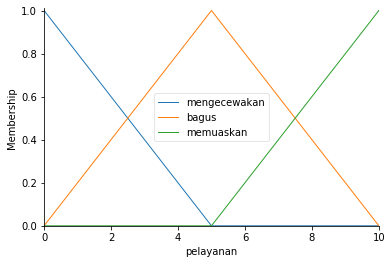

In [5]:
pelayanan.view()

### Membership makanan
Dalam variabel makanan terdapat dua buah kriteria, yaitu:
- Hambar
- Enak

In [7]:
makanan['hambar'] = fuzz.trimf(makanan.universe, [0, 0, 7])
makanan['enak']   = fuzz.trimf(makanan.universe, [3, 10, 10])

Hasil dari fungsi membership makanan dapat dilihat pada gambar dibawah ini:

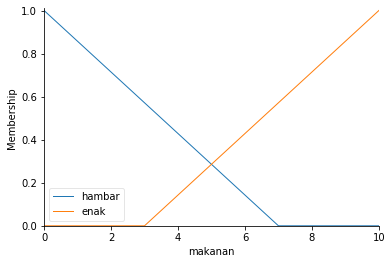

In [8]:
makanan.view()

### Membership bonus
Dalam variabel bonus terdapat tiga buah kriteria, yaitu:
- Sedikit
- Sedang
- Banyak

In [9]:
bonus['sedikit'] = fuzz.trimf(bonus.universe, [0, 5, 10])
bonus['sedang']  = fuzz.trimf(bonus.universe, [10, 15, 20])
bonus['banyak']  = fuzz.trimf(bonus.universe, [20, 25, 30])

Hasil dari fungsi membership makanan dapat dilihat pada gambar dibawah ini:

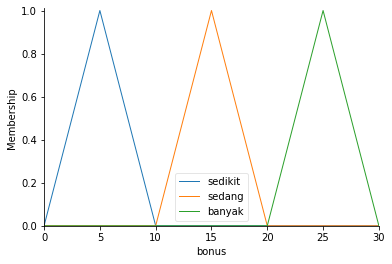

In [10]:
bonus.view()

## Membuat Rule Base
Langkah selanjutnya yaitu membuat rule base, dalam implementasi kali ini terdapat tiga buah aturan yang perlu kita buat, diantaranya:
- Jika **makanan hambar** atau **pelayanan mengecewakan** maka bonus yang didapat **sedikit**
- Jika **pelayanan bagus** maka bonus yang didapat **sedang**
- Jika **makanan enak** atau **pelayanan memuaskan** maka bonus yang didapat **banyak**

Meskipun rule yang dibuat bisa lebih dari yang tertera diatas, akan tetapi untuk saat ini tidak menggunakan terlalu banyak rule terlebih dahulu.

In [11]:
rule = [
    ctrl.Rule(makanan['hambar'] | pelayanan['mengecewakan'], bonus['sedikit']),
    ctrl.Rule(pelayanan['bagus'], bonus['sedang']),
    ctrl.Rule(makanan['enak'] | pelayanan['memuaskan'], bonus['banyak'])
]

## Defuzzyfikasi
Dalam proses defuzzyfikasi ini kita akan mengubah nilai fuzzy menjadi nilai crisp. Dimulai dengan memasukkan rule dari fuzzy kedalam Fuzzy Control System dengan memanfaatkan fungsi ```ControlSystem```. Kemudian menggunakan ```ControlSystemSimulation``` untuk memperoleh hasil perhitungan dari ```ControlSystem```.

In [12]:
bonus_ctrl = ctrl.ControlSystem(rule)
kalkulasi_bonus = ctrl.ControlSystemSimulation(bonus_ctrl)

Kemudian memberikan nilai input untuk masing-masing Antecedent atau variabel input.

In [13]:
kalkulasi_bonus.input['pelayanan'] = 5
kalkulasi_bonus.input['makanan']   = 5

Kemudian memulai proses defuzzyfikasi dengan memanggil fungsi ```compute```.

In [14]:
kalkulasi_bonus.compute()

print("Total kalkulasi bonus: {0}".format(kalkulasi_bonus.output['bonus']))

Total kalkulasi bonus: 14.999999999999995


Terakhir menampilkan hasil dari defuzzyfikasi.

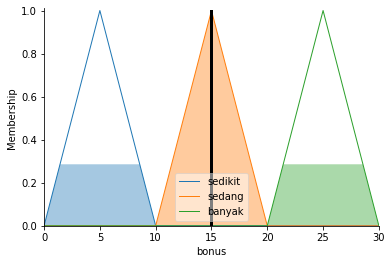

In [15]:
bonus.view(sim=kalkulasi_bonus)

Dilihat dari hasilnya, maka dengan kualitas makanan 5 dan kualitas pelayanan 5 akan memperoleh bonus sebesar 15